# Section 3.2 — Estimators

This notebook contains the code examples from [Section 3.1 Estimators]() of the **No Bullshit Guide to Statistics**.

We'll begin our study of inferential statistics by introducing **estimators**,
which are the math tools used for both **estimation**  and **hypothesis testing**.

![simplified_estimators.png](../stats_overview/figures/simplified_estimators.png)

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)
blue, orange  = sns.color_palette()[0], sns.color_palette()[1]

DESTDIR = "figures/stats/estimators"

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
from plot_helpers import plot_pdf
from plot_helpers import savefigure

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$


## Statistical inference context

DATA:
- population
- sample
- statistic

PROB:
- probability model
- model family
- parameters


Statistical inference is the use the values of the statistics obtained from the sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ to estimate the population parameters $\theta$. For example,
the sample mean $\overline{\mathbf{x}}=\Mean(\mathbf{x})$ is an estimate of the population mean $\mu$,
and the sample variance $s_{\mathbf{x}}^2=\Var(\mathbf{x})$ is an estimate of the population variance $\sigma^2$.

## Estimator definitions

- We use the term "estimator" to describe a function $g$ that takes samples as inputs
  and produces parameter estimates as outputs.
  Written mathematically, and estimator is a function of the form:
  $$
   g \colon \underbrace{\mathcal{X}\times \mathcal{X}\times \cdots \times \mathcal{X}}_{n \textrm{ copies}}
   \quad \to \quad \mathbb{R},
  $$
  where $n$ is the samples size and $\mathcal{X}$ denotes the possible values of the random variable $X$.
- We give different names to estimates, depending on the use case:
  - **statistic** = a quantity computed from a sample (e.g. descriptive statistics)
  - **parameter estimates** = statistics that estimate population parameters
  - **test statistic** = an estimate used as part of hypothesis testing procedure
- The **value** of the estimator $g(\mathbf{x})$ is computed from a particular sample
  $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.
- The **sampling distribution** of the estimator $g$ is the distribution of $g(\mathbf{X})$,
  where $\mathbf{X} = (X_1, X_2, \ldots, X_n)$ is a *random sample*.

### Estimators for numerical variables

Let's start with some estimators you're already familiar with (discussed in [descriptive statistics](./13_descriptive_statistics.ipynb)):

#### Sample mean

  - estimator: $\overline{\mathbf{x}} = g(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n x_i$
  - gives an estimate for the population mean $\mu$

In [5]:
def mean(sample):
    return sum(sample) / len(sample)

# ALT. use np.mean(sample)
# ALT. use .mean() method on a Pandas series

In [6]:
mean([1,2,3])

2.0

#### Sample variance

  - estimator: $s_{\mathbf{x}}^2 = h(\mathbf{x}) = \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{\mathbf{x}})^2$
  - gives an estimate for the population variance $\sigma^2$
  - note the denominator is $(n-1)$ and not $n$ 

In [7]:
def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

# ALT. use np.var(sample, ddof=1)
# ALT. use .var() method on a Pandas series

In this notebook we'll develop some new estimators that are specific for the comparison of the two groups.

#### Difference between sample means
  - estimator: $\hat{d} = \Mean(\mathbf{x}_A) - \Mean(\mathbf{x}_B) = \overline{\mathbf{x}}_A - \overline{\mathbf{x}}_B$
  - gives an estimate for the difference between population means: $\Delta =  \mu_A - \mu_B$

In [8]:
def dmeans(xA, xB):
    """
    Estimator for the difference between group means.
    """
    d = np.mean(xA) - np.mean(xB)
    return d

#### Example 1: electricity prices means, variances, and difference between means


In [9]:
eprices = pd.read_csv("../datasets/eprices.csv")
xE = eprices["East"]

mean(xE), np.mean(xE), xE.mean()

(6.155555555555555, 6.155555555555556, 6.155555555555556)

In [10]:
var(xE), np.var(xE, ddof=1), xE.var()

(0.7702777777777777, 0.770277777777778, 0.770277777777778)

In [11]:
np.sqrt(var(xE)), np.std(xE, ddof=1), xE.std()

(0.877654703045439, 0.8776547030454391, 0.8776547030454391)

In [12]:
xE = eprices["East"]
xW = eprices["West"]

dmeans(xW, xE)

3.000000000000001

### Estimators for categorical variables

We'll also discuss estimators for working with samples of discrete values, based on counting:

#### Sample proportion
  - estimator: $\widehat{p} = \RelFreq_{\mathbf{x}}(1) = \frac{ \textrm{count of } 1\textrm{s in } \mathbf{x} }{n} = g(\mathbf{x})$
  - gives an estimate of the parameter $p$ for a Bernoulli population

#### Difference between sample proportions
  - estimator: $\hat{d} = \widehat{p}_{\mathbf{x}} - \widehat{p}_{\mathbf{y}} = d(\mathbf{x}, \mathbf{y})$
  - gives an estimate for the difference between population proportions $\delta = p_x - p_y$

#### Example 2: A/B website proportions and difference between proportions

In [13]:
visitors = pd.read_csv("../datasets/visitors.csv")
xA = visitors[visitors["version"]=="A"]["bought"]
phat = xA.mean()
phat

0.046351084812623275

In [14]:
mean(xA)

0.046351084812623275

In [15]:
# ALT.
# np.count_nonzero(xA) / len(xA)

In [16]:
# ALT.
# xA.value_counts()[1] / len(xA)

In [17]:
xA = visitors[visitors["version"]=="A"]["bought"]
xB = visitors[visitors["version"]=="B"]["bought"]
pAhat = xA.mean()
pBhat = xB.mean()
dhat = pBhat - pAhat
dhat

0.01044404703321851

## Estimator applications

- Parameter estimates
- Effect size estimates
- Confidence intervals
- Test statistics

TODO: import one-liner explanation for each of these


## Sampling distributions


TODO import definitions


### Examples of sampling distributions

Let's look at the same estimators that we described in the previous section,
but this time applied to *random* samples of size $n$:

- Sample mean: $\overline{\mathbf{X}} = g(\mathbf{X}) = \tfrac{1}{n}\sum_{i=1}^n X_i$
- Sample variance: $S_{\mathbf{X}}^2 = h(\mathbf{X}) = \tfrac{1}{n-1}\sum_{i=1}^n \left(X_i - \overline{\mathbf{X}} \right)^2$
- Difference between sample means: $\hat{D} = d(\mathbf{X}, \mathbf{Y}) = \overline{\mathbf{X}} - \overline{\mathbf{Y}}$ 
- Sample proportion: $\widehat{P} = g(\mathbf{X}) = \frac{1}{n}\sum_{i=1}^n X_i$
- Difference between proportions: $\hat{D} = \widehat{P}_{\mathbf{X}} - \widehat{P}_{\mathbf{Y}} = d(\mathbf{X}, \mathbf{Y})$

Note these formulas is identical to the formulas we saw earlier.
The only difference is that we're calculating the functions $g$, $h$, and $d$ based on a random sample $\mathbf{X} = (X_1, X_2, \ldots, X_n)$,
instead of particular sample $\mathbf{x} = (x_1, x_2, \ldots, x_n)$.

### Estimator properties

- bias
- variance
- standard error



### Visualizing sampling distributions



In [18]:
def gen_sampling_dist(rv, statfunc, n, N=10000):
    stats = []
    for i in range(0, N):
        sample = rv.rvs(n)
        stat = statfunc(sample)
        stats.append(stat)
    return stats

#### Example 3: normally distributed population with known parameters

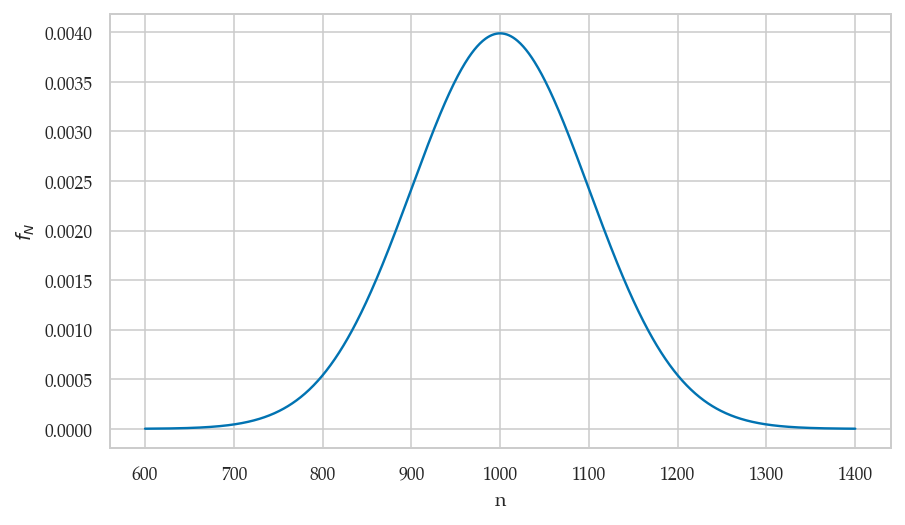

In [19]:
from scipy.stats import norm
mu = 1000
sigma = 100
rvN = norm(mu, sigma)

ax = plot_pdf(rvN, xlims=[600,1400], rv_name="N")

In [20]:
# filename = os.path.join(DESTDIR, "plot_pdf_normal_mu1000_sigma100.pdf")
# with plt.rc_context({"figure.figsize":(5,2)}):
#     ax = plot_pdf(rvN, xlims=[600,1400], rv_name="N")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

##### Sampling distribution of sample mean

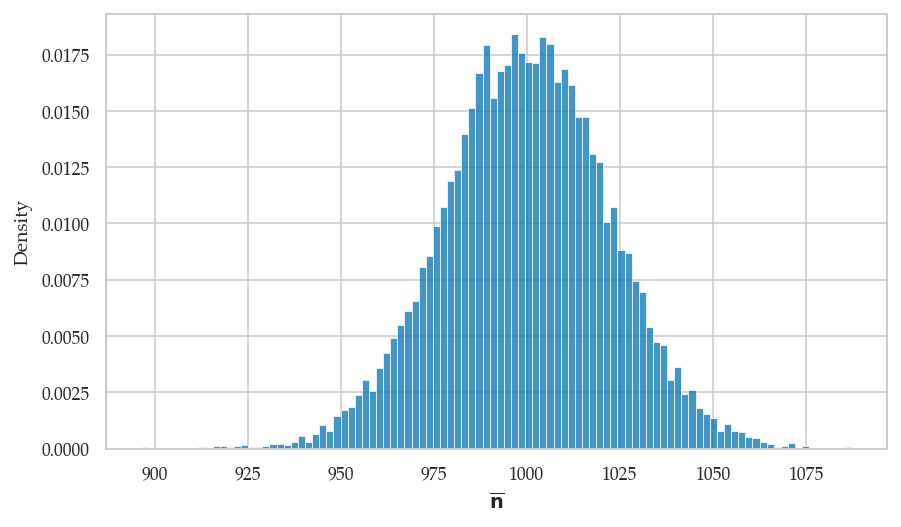

In [21]:
np.random.seed(43)
nbars = gen_sampling_dist(rvN, statfunc=mean, n=20)
ax = sns.histplot(nbars, stat="density", bins=100)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

In [22]:
# filename = os.path.join(DESTDIR, "sampling_dist_mean_n20_normal_mu1000_sigma100.pdf")
# with plt.rc_context({"figure.figsize":(5,2)}):
#     ax = sns.histplot(nbars, stat="density")
#     ax.set_xlabel("$\overline{\mathbf{n}}$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [23]:
np.mean(nbars), np.std(nbars, ddof=1)

(999.7597183686964, 22.08170264354009)

In [24]:
mu

1000

##### Sampling distribution of sample variance

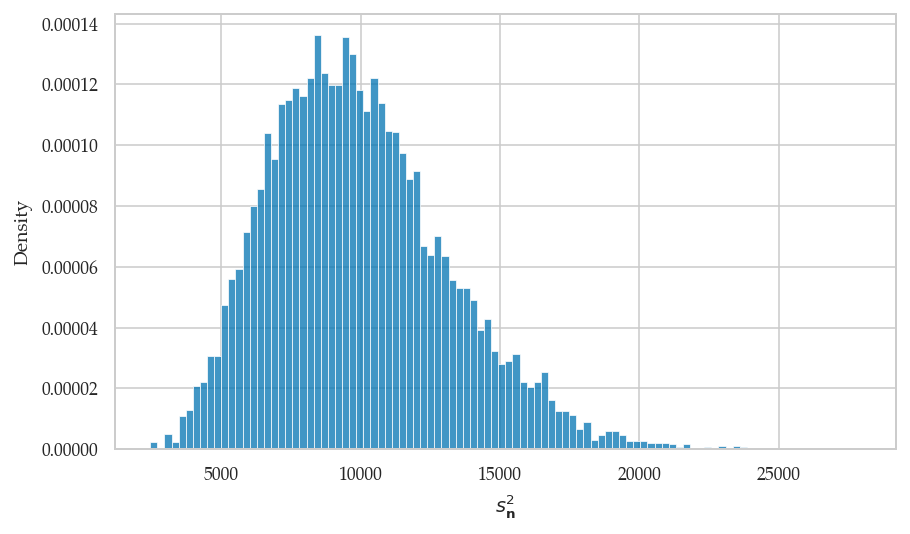

In [25]:
np.random.seed(44)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density", bins=100)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

In [26]:
# filename = os.path.join(DESTDIR, "sampling_dist_var_n20_normal_mu1000_sigma100.pdf")
# with plt.rc_context({"figure.figsize":(5,2)}):
#     ax = sns.histplot(nvars, stat="density")
#     ax.set_xlabel("$s^2_{\mathbf{n}}$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [27]:
np.mean(nvars), np.std(nvars, ddof=1)

(9939.922540353122, 3227.4956066682976)

In [28]:
sigma**2

10000

##### Sampling distribution of sample median

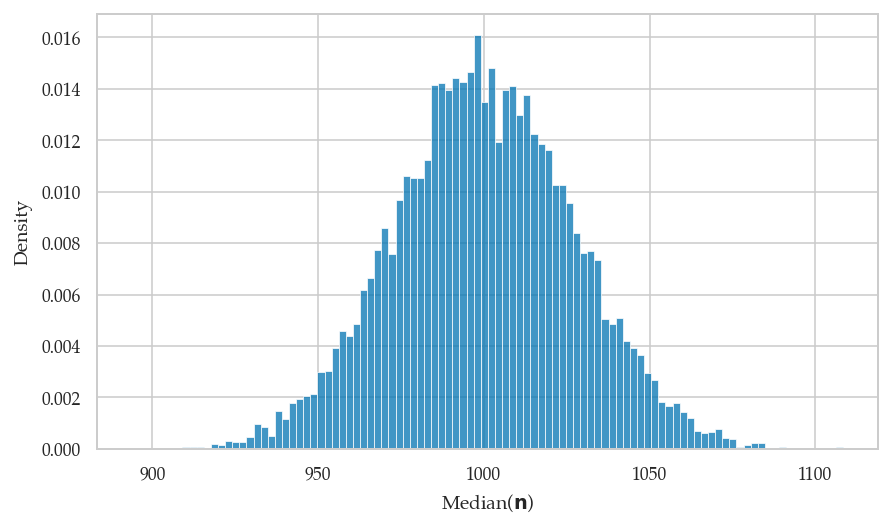

In [29]:
np.random.seed(44)
nmedians = gen_sampling_dist(rvN, statfunc=np.median, n=20)
ax = sns.histplot(nmedians, stat="density", bins=100)
_ = ax.set_xlabel("Median(${\mathbf{n}}$)")

##### Sampling distribution of 90th percentile

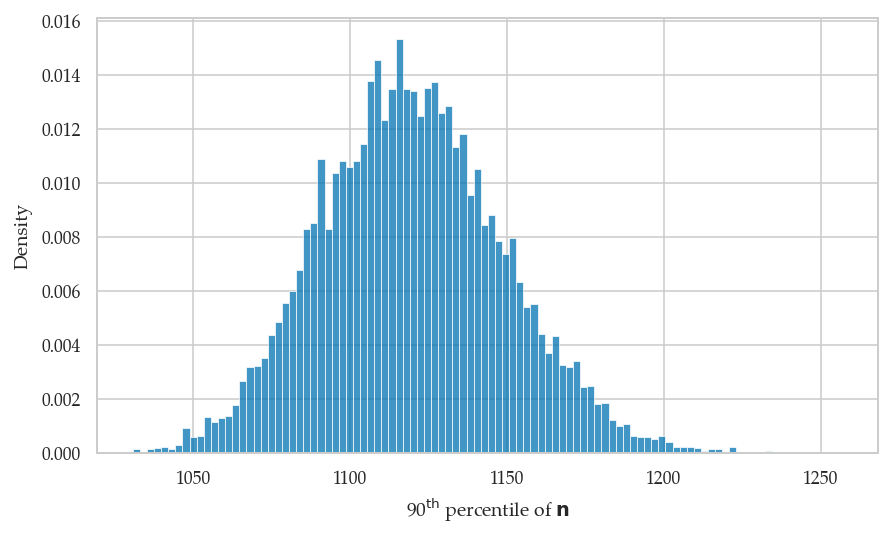

In [30]:
def ninetypctile(sample):
    return np.percentile(sample, 90)
    
ninetypctiles = gen_sampling_dist(rvN, statfunc=ninetypctile, n=30)
ax = sns.histplot(ninetypctiles, stat="density", bins=100)
_ = ax.set_xlabel("90$^\mathrm{th}$ percentile of ${\mathbf{n}}$")

## Analytical derivations

### Sample mean estimator

CLT

In [31]:
np.random.seed(51)
nsample7 = rvN.rvs(7)
nsample7

array([ 970.94968267, 1011.21280471, 1125.07951228,  863.91100289,
       1009.99328823,  995.20088969,  964.37703097])

In [32]:
xbar = mean(nsample7)
xstd = np.sqrt( np.var(nsample7, ddof=1) )
xbar, xstd

(991.5320302051665, 77.48623002231908)

In [33]:
# the true population parameters
mu, sigma

(1000, 100)

#### Known mean sampling dist

n = 7
1005.4008321273957 85.19918219548087 32.20226399933206


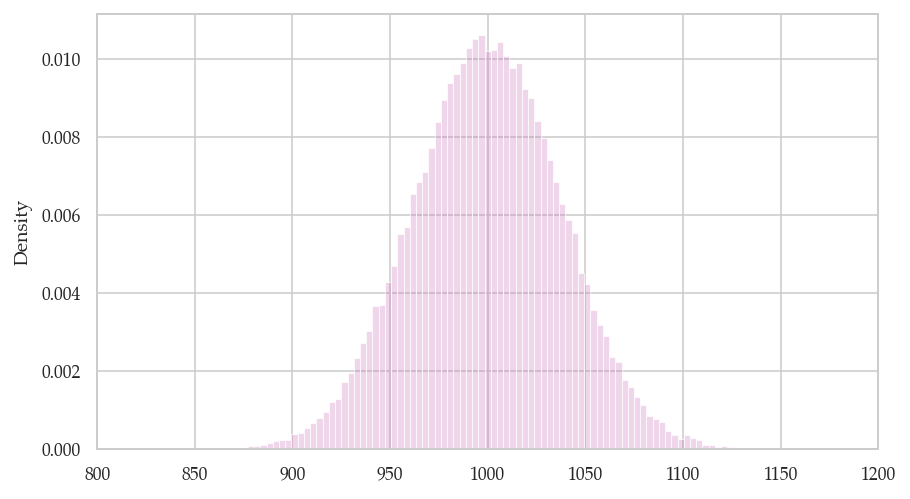

In [34]:
np.random.seed(48)
# np.random.seed(54)
n = 7
print("n =", n)

from scipy.stats import norm
mu = 1000
sigma = 100
rvN = norm(mu, sigma)

fig, ax = plt.subplots()

# true sampling distirbution of the mean
nbars = gen_sampling_dist(rvN, statfunc=mean, n=n, N=50000)
sns.histplot(nbars, stat="density", bins=100, ax=ax, alpha=0.3, color="m")
ax.set_xlim([800,1200])

np.random.seed(52)
# generate a particular sample
nsample = rvN.rvs(n)
xbar = mean(nsample)
xstd = np.std(nsample, ddof=1)
sehat = xstd / np.sqrt(n)
print(xbar, xstd, sehat)

In [35]:
# Normal distribution (known mean)
from scipy.stats import norm
rvY = norm(mu, sehat)
plot_pdf(rvY, ax=ax)

<AxesSubplot:xlabel='x', ylabel='$f_{X}$'>

In [36]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_N_approx_from_nsample7.pdf")
ax.set_xlabel("$\overline{\mathbf{n}}$")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_N_approx_from_nsample7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_N_approx_from_nsample7.png


<AxesSubplot:xlabel='x', ylabel='$f_{X}$'>

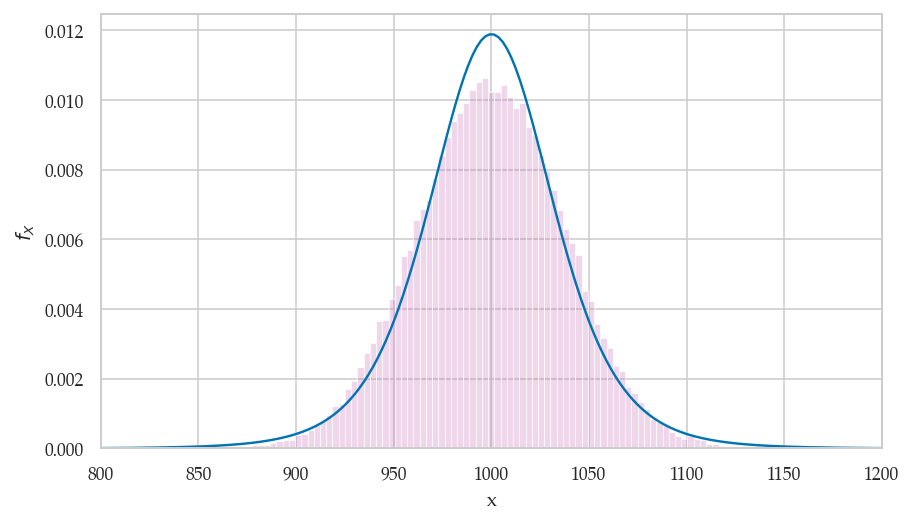

In [37]:
fig, ax = plt.subplots()

# true sampling distirbution of the mean
sns.histplot(nbars, stat="density", bins=100, ax=ax, alpha=0.3, color="m")
ax.set_xlim([800,1200])

# Student's t-distribution (known mean)
from scipy.stats import t as tdist
df = n - 1
rvT = tdist(df, loc=mu, scale=sehat)
plot_pdf(rvT, ax=ax)

In [38]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_T_approx_from_nsample7.pdf")
ax.set_xlabel("$\overline{\mathbf{n}}$")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_T_approx_from_nsample7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvN_and_T_approx_from_nsample7.png


#### Best-approximation from sample of size $n=7$

1031.741475911664 70.84903005849972


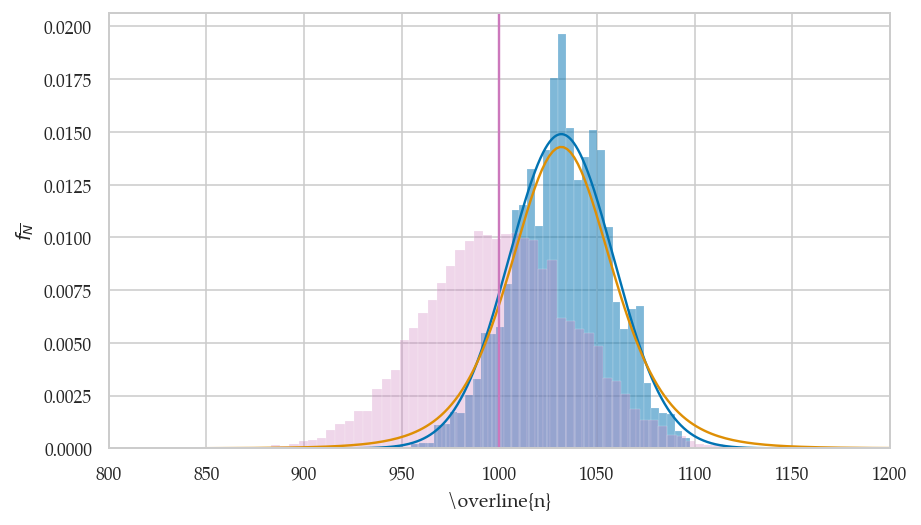

In [82]:
# np.random.seed(51)
nsample7 = rvN.rvs(7)
nsample7

xbar = mean(nsample7)
xstd = np.sqrt( np.var(nsample7, ddof=1) )
print(xbar, xstd)

from scipy.stats import norm
rvY = norm(xbar, xstd/np.sqrt(7))
ax = plot_pdf(rvY)

from scipy.stats import t as tdist
rvT = tdist(7-1, loc=xbar, scale=xstd/np.sqrt(7))
plot_pdf(rvT, ax=ax, rv_name="\overline{N}")

from plot_helpers import bootstrap_stat
nbars_boot = bootstrap_stat(nsample7, statfunc=mean)
ax = sns.histplot(nbars_boot, stat="density", ax=ax, alpha=0.5)

nbars7 = gen_sampling_dist(rvN, statfunc=mean, n=7)
sns.histplot(nbars7, stat="density", ax=ax, alpha=0.3, color="m")
ax.set_xlim([800,1200])

ax.axvline(rvN.mean(), linestyle="-", color="m")

In [81]:
# filename = os.path.join(DESTDIR, "sampling_dist_mean_rvN_and_N_T_boot_approxs_from_nsample7.pdf")
# ax.set_xlabel("$\overline{\mathbf{n}}$")
# savefigure(ax, filename)

#### Best-approximation from sample of size $n=20$

994.341216220457 96.51032049088938


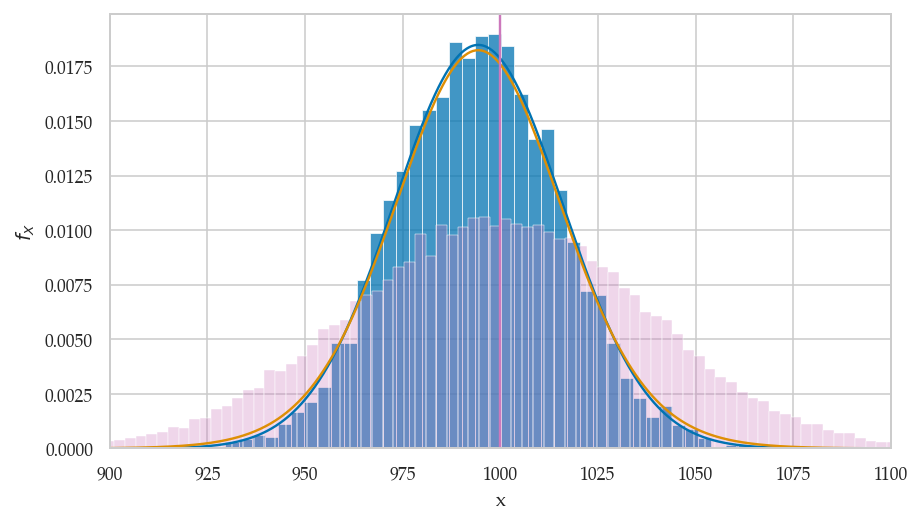

In [40]:
# np.random.seed(51)
nsample20 = rvN.rvs(20)
nsample20

xbar = mean(nsample20)
xstd = np.sqrt( np.var(nsample20, ddof=1) )
print(xbar, xstd)

from scipy.stats import norm
rvY = norm(xbar, xstd/np.sqrt(20))
ax = plot_pdf(rvY)

from scipy.stats import t as tdist
rvT = tdist(20-1, loc=xbar, scale=xstd/np.sqrt(20))
plot_pdf(rvT, ax=ax)

nbars_boot = bootstrap_stat(nsample20, statfunc=mean)
ax = sns.histplot(nbars_boot, stat="density", ax=ax)

sns.histplot(nbars, stat="density", ax=ax, alpha=0.3, color="m")
ax.set_xlim([900,1100])

ax.axvline(rvN.mean(), linestyle="-", color='m')

### Sample variance estimator


Chi-square

1033.3894622134771 90.91929719984405


<AxesSubplot:xlabel='s^2', ylabel='$f_{S^2}$'>

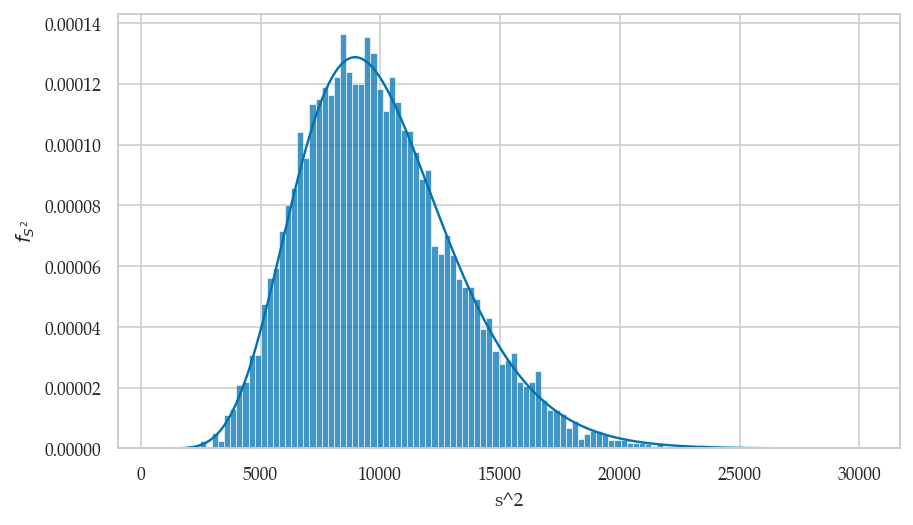

In [41]:
nsample20 = rvN.rvs(20)
nsample20
xbar = mean(nsample20)
xstd = np.sqrt( np.var(nsample20, ddof=1) )
print(xbar, xstd)


from scipy.stats import chi2
X2 = chi2(20-1, loc=0, scale=sigma**2/(20-1))
ax = plot_pdf(X2, rv_name="S^2")


sns.histplot(nvars, stat="density", bins=100, ax=ax)

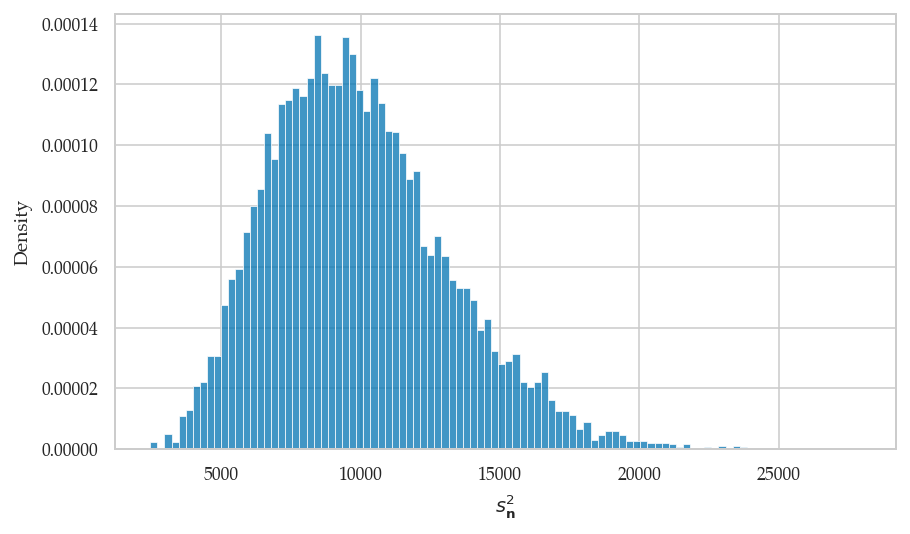

In [42]:
np.random.seed(44)
nvars = gen_sampling_dist(rvN, statfunc=var, n=20)
ax = sns.histplot(nvars, stat="density", bins=100)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

### Difference between means estimator


Consider two normally distributed random variables $X_A$ and $X_B$:
$$ 
X_A \sim \mathcal{N}\!\left(\mu_A, \sigma_A \right)
\qquad
\textrm{and}
\qquad
X_B \sim \mathcal{N}\!\left(\mu_B, \sigma_B \right)
$$
that describe the probability distribution for groups A and B, respectively.

- A sample of size $n_A$ from $X_A$ is denoted $\mathbf{x}_A = (x_1, x_2, \ldots, x_{n_A})$=`xA`,
  and let $\mathbf{x}_B = (x_1, x_2, \ldots, x_{n_B})$=`xB` be a random sample of size $n_B$ from $X_B$.
- We compute the mean in each group: $\overline{\mathbf{x}}_{A} = \texttt{mean}(\mathbf{x}_A)$
  and $\overline{\mathbf{x}}_{B} = \texttt{mean}(\mathbf{x}_B)$
- The value of the estimator is $\hat{d} = \overline{\mathbf{x}}_{A} - \overline{\mathbf{x}}_{B}$

Note the difference between group means is precisely the estimator Amy need for her analysis (**Group S** and **Group NS**). We intentionally use the labels **A** and **B** to illustrate the general case.

#### Sampling distribution of the estimator `dmeans`

How well does the estimate $\hat{d}$ approximate the true value $\Delta$?
**What is the accuracy and variability of the estimates we can expect?**

To answer these questions, consider the random samples
$\mathbf{X}_A = (X_1, X_2, \ldots, X_{n_A})$
and $\mathbf{X}_B = (X_1, X_2, \ldots, X_{n_B})$,
then compute the **sampling distribution**: $\hat{D} = \overline{\mathbf{X}}_A - \overline{\mathbf{X}}_{B}$.

By definition, the sampling distribution of the estimator is obtained by repeatedly generating samples `xA` and `xB` from the two distributions and computing `dmeans` on the random samples. For example, we can obtain the sampling distribution by generating $N=1000$ samples.

#### Theoretical model for the sampling distribution of `dmeans`

Let's now use probability theory to build a theoretical model for the sampling distribution of the difference-between-means estimator `dmeans`.

- The central limit theorem tells us the sample mean within the two group are
  $$
  \overline{\mathbf{X}}_A \sim \mathcal{N}\!\left(\mu_A, \tfrac{\sigma_A}{\sqrt{n_A}} \right)
  \qquad \textrm{and} \qquad
  \overline{\mathbf{X}}_B \sim \mathcal{N}\!\left(\mu_B, \tfrac{\sigma_B}{\sqrt{n_B}} \right).
  $$

- The rules of probability theory tells us that the [difference of two normal random variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Independent_random_variables) requires subtracting their means and adding their variance, so we get:
  $$
  D \sim \mathcal{N}\!\left(\mu_A - \mu_B, \  \sqrt{\tfrac{\sigma^2_A}{n_A} + \tfrac{\sigma^2_B}{n_B}} \right).
  $$

In other words, the sampling distribution for the difference between means estimator $\hat{D}$ has mean and standard deviation given by:
$$ 
   \mu_D = \mu_A - \mu_B
   \qquad \textrm{and} \qquad
   \sigma_D = \sqrt{ \tfrac{\sigma^2_A}{n_A} + \tfrac{\sigma^2_B}{n_B}  }.
$$

Probability theory predicts the sampling distribution had mean ...

In [43]:
# Dmean = muA - muB
# Dmean

... and standard deviation:

In [44]:
# Dstd = np.sqrt(sigmaA**2/nA + sigmaB**2/nB)
# Dstd

Let's plot the theoretical sampling distribution 
on top of the simulated data to see if they are a good fit.

In [45]:
# x = np.linspace(min(dmeans_sdist), max(dmeans_sdist), 10000)
# D = norm(Dmean, Dstd).pdf(x)
# label = 'Theoretical sampling distribuition'
# sns.lineplot(x=x, y=D, ax=ax3, label=label, color=blue)
# ax3.figure

### Proportion estimator


In [46]:
visitors = pd.read_csv("../datasets/visitors.csv")
xA = visitors[visitors["version"]=="A"]["bought"].values
phat = xA.mean()
phat

0.046351084812623275

In [47]:
pvar = phat*(1-phat)
pvar

0.04420266174931628

In [48]:
n = len(xA)
se_Phat = np.sqrt(pvar/n)
se_Phat

0.006602451710468567

Normal approximation to the sampling distribution.

<AxesSubplot:xlabel='x', ylabel='$f_{X}$'>

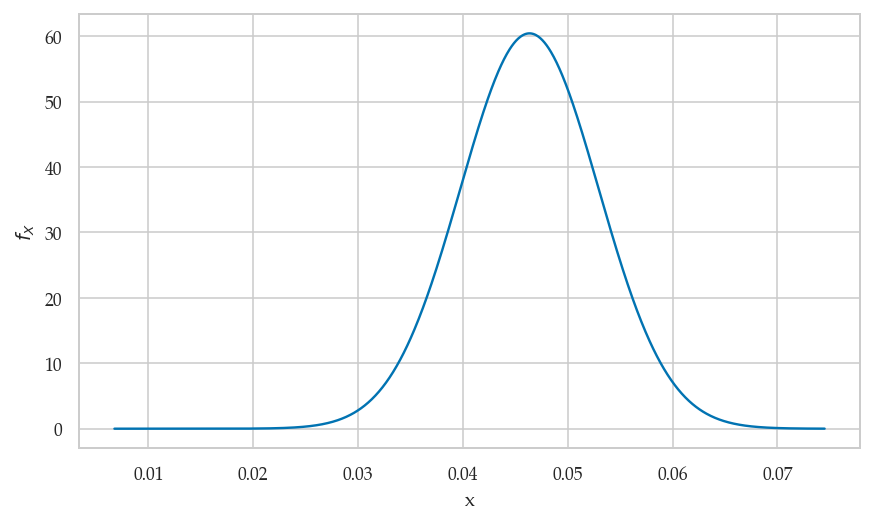

In [49]:
from scipy.stats import norm
Phat = norm(phat, se_Phat)
plot_pdf(Phat)

### Difference between proportion estimator

In [50]:
visitors = pd.read_csv("../datasets/visitors.csv")
xA = visitors[visitors["version"]=="A"]["bought"].values
xB = visitors[visitors["version"]=="B"]["bought"].values
pAhat = xA.mean()
pBhat = xB.mean()
pAhat, pBhat

(0.046351084812623275, 0.056795131845841784)

In [51]:
d = pBhat - pAhat
d

0.01044404703321851

In [52]:
nA, nB = len(xA), len(xB)
varA = pAhat*(1-pAhat)
varB = pBhat*(1-pBhat)
seD = np.sqrt(varA/nA + varB/nB)

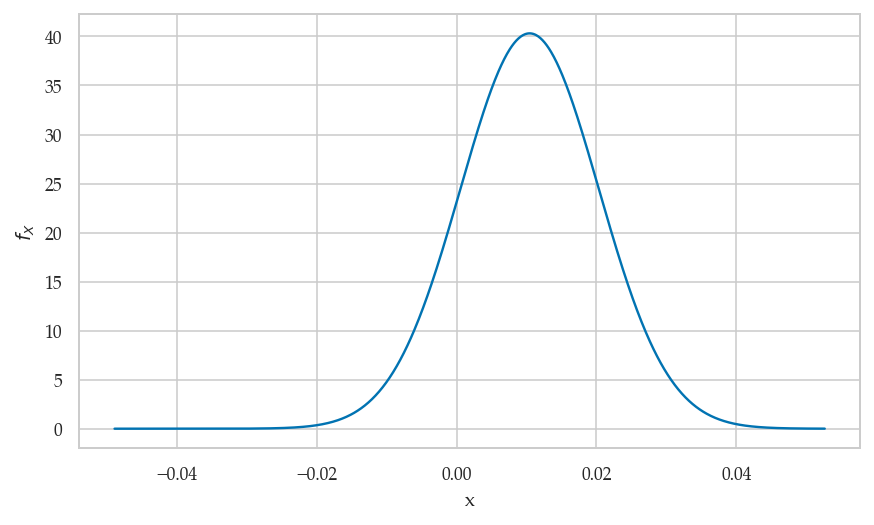

In [53]:
from scipy.stats import norm
Dhat = norm(d, seD)
ax = plot_pdf(Dhat)

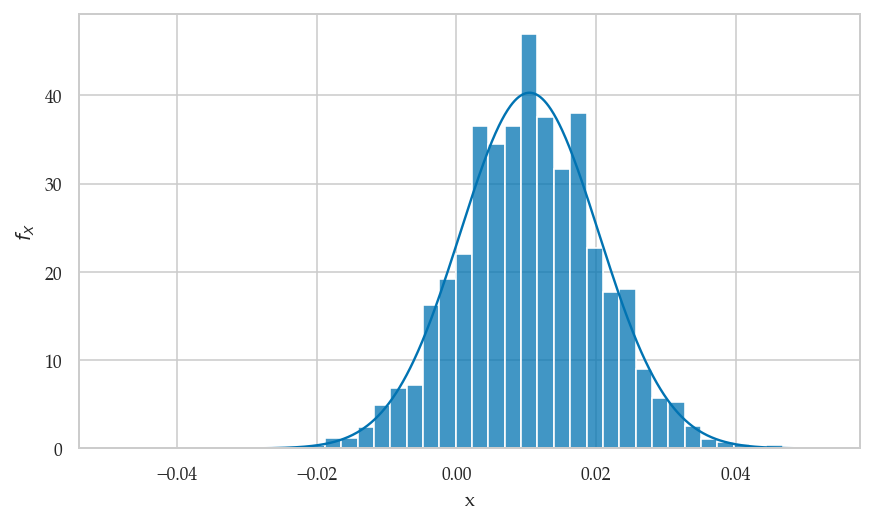

In [54]:
# compute bootstrap estimates for mean in each group
meanA_bstats = bootstrap_stat(xA, statfunc=np.mean)
meanB_bstats = bootstrap_stat(xB, statfunc=np.mean)

# compute the difference between means from bootstrap samples
dprops_bstats = []
for bmeanA, bmeanB in zip(meanA_bstats, meanB_bstats):
    d_boot = bmeanB - bmeanA
    dprops_bstats.append(d_boot)

sns.histplot(dprops_bstats, stat="density", ax=ax, bins=30)
ax.figure

## Bootstrap estimation

In [55]:
from statistics import mean

def bootstrap_stat(sample, statfunc=mean, B=5000):
    """
    Compute the sampling dist. of the `statfunc` estimator
    from `B` bootstrap samples generated from `sample`.
    """
    n = len(sample)
    bstats = []
    for i in range(0, B):
        bsample = np.random.choice(sample, n, replace=True)
        bstat = statfunc(bsample)
        bstats.append(bstat)
    return bstats

#### Example 3 (continued): normal distribution

In [56]:
np.random.seed(47)
nsample20 = rvN.rvs(20)
nsample20

array([ 915.19905242, 1130.59063579, 1092.42079662, 1064.04118012,
        894.52630171, 1179.77607151,  898.72132495, 1082.36233243,
        970.53496466,  940.75294285,  860.62729413, 1110.41796717,
        906.76597141,  905.68435632, 1043.66062317, 1079.495827  ,
       1071.95331527, 1008.76622566,  867.72515937, 1005.17939788])

In [57]:
nsample20.mean()

1001.460087023688

In [58]:
np.random.seed(48)
nsample7 = rvN.rvs(7)
nsample7

array([ 900.63686801,  893.65991945,  936.19240842, 1106.1588689 ,
        984.25958486, 1109.37284787,  792.51459815])

In [59]:
nsample7.mean()

960.3992993795576

#### Bootstrapped sampling distribution of the sample mean

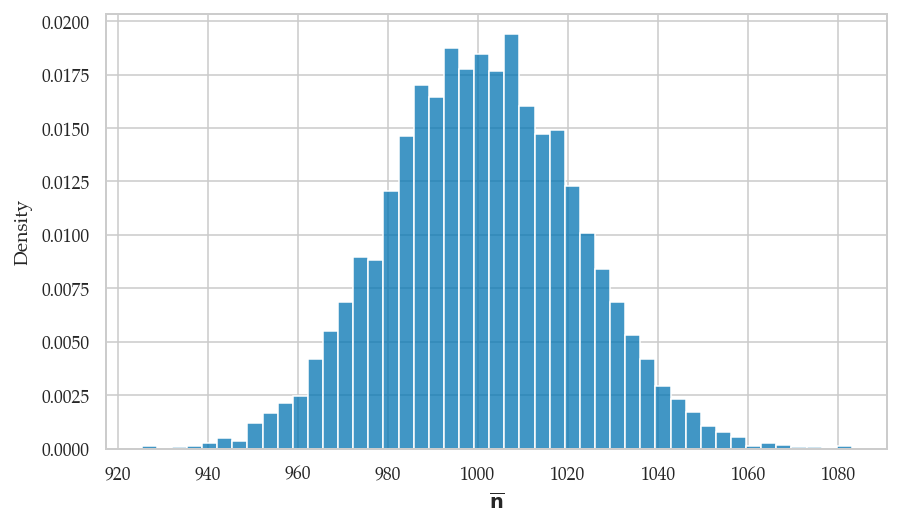

In [60]:
np.random.seed(48)
nbars_boot = bootstrap_stat(nsample20, statfunc=mean)
ax = sns.histplot(nbars_boot, stat="density")
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

In [61]:
# filename = os.path.join(DESTDIR, "bootstrap_dist_mean_n20_normal_mu1000_sigma100.pdf")
# with plt.rc_context({"figure.figsize":(5,2)}):
#     ax = sns.histplot(nbars_boot, stat="density")
#     ax.set_xlabel("$\overline{\mathbf{n}}$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [62]:
np.mean(nbars_boot), np.std(nbars_boot, ddof=1)

(1001.0014581308317, 20.936054616679304)

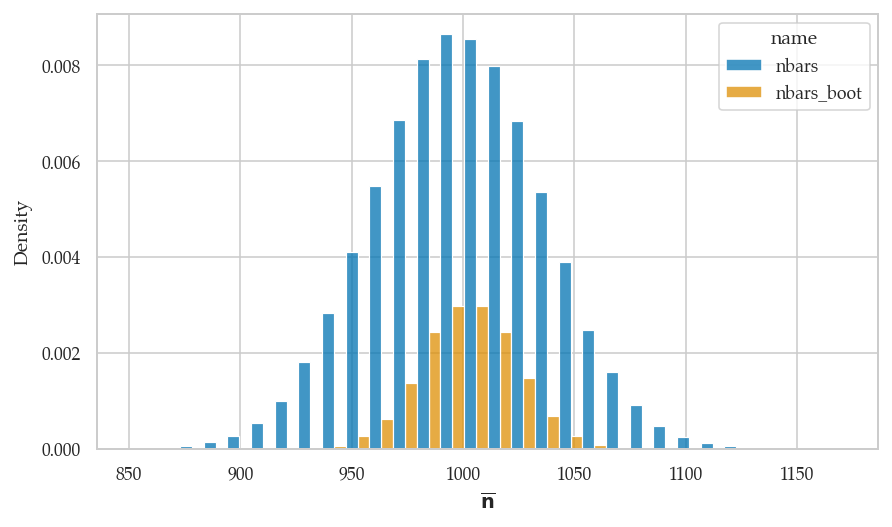

In [63]:
# combined histogram
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': nbars, 'name': 'nbars'}),
    pd.DataFrame.from_dict({'value': 2*nbars_boot, 'name': 'nbars_boot'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=30, stat="density", x='value', hue='name', multiple='dodge',ax=ax)
_ = ax.set_xlabel("$\overline{\mathbf{n}}$")

#### Bootstrapped sampling distribution of the sample variance

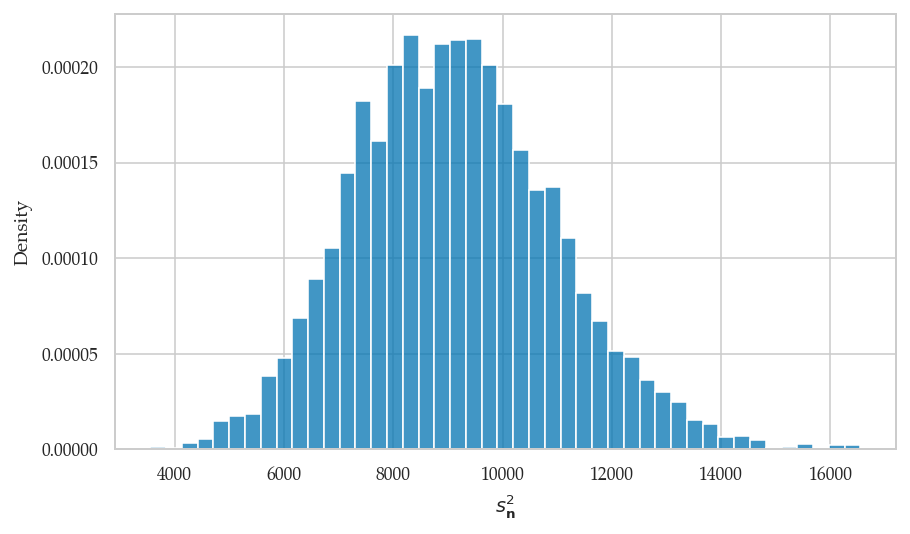

In [64]:
np.random.seed(48)
nvars_boot = bootstrap_stat(nsample20, statfunc=var)
ax = sns.histplot(nvars_boot, stat="density")
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

In [65]:
# filename = os.path.join(DESTDIR, "bootstrap_dist_var_n20_normal_mu1000_sigma100.pdf")
# with plt.rc_context({"figure.figsize":(5,2)}):
#     ax = sns.histplot(nvars_boot, stat="density")
#     ax.set_xlabel("$s^2_{\mathbf{n}}$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [66]:
np.mean(nvars_boot), np.std(nvars_boot, ddof=1)

(9126.301558576393, 1846.198278359838)

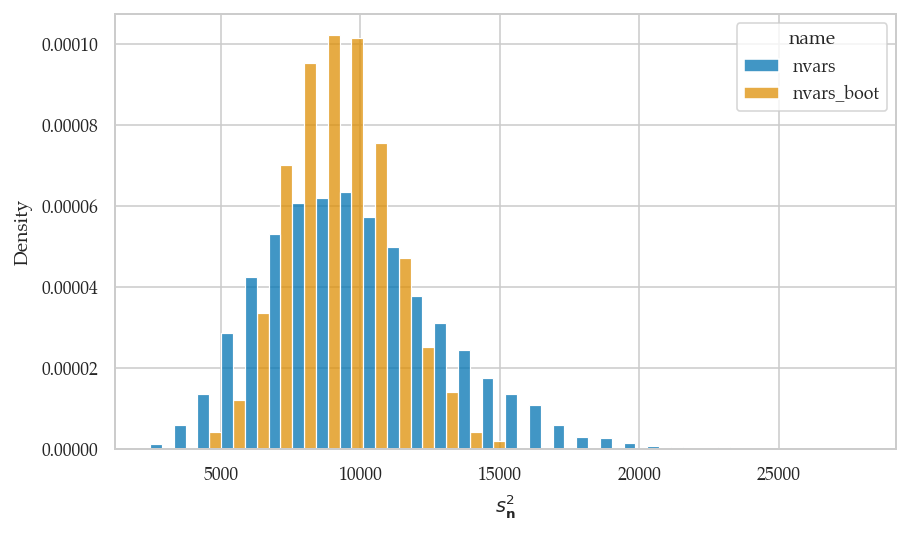

In [67]:
# combined histogram
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': nvars, 'name': 'nvars'}),
    pd.DataFrame.from_dict({'value': 2*nvars_boot, 'name': 'nvars_boot'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=30, stat="density", x='value',
             hue='name', multiple='dodge',ax=ax)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

#### Bootstrapped sampling distribution of the sample median

<AxesSubplot:ylabel='Count'>

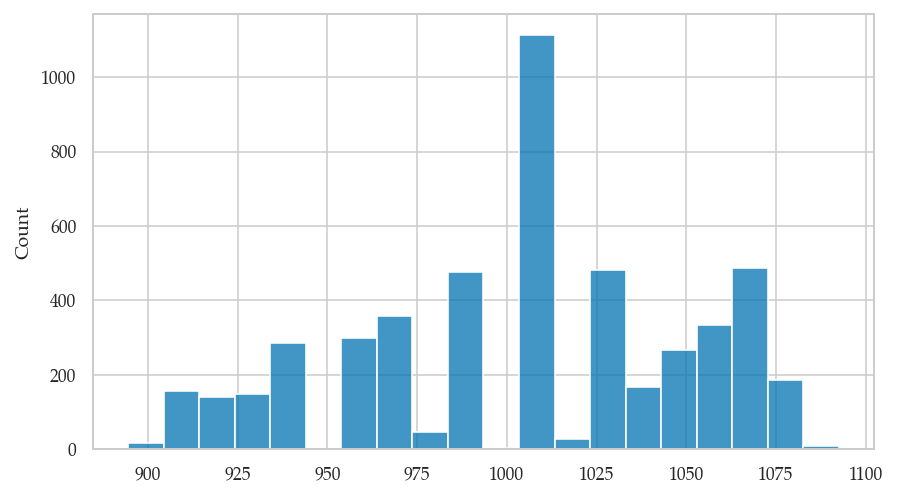

In [68]:
np.random.seed(49)
nmedians_boot = bootstrap_stat(nsample20, statfunc=np.median)
sns.histplot(nmedians_boot, bins=20)

In [69]:
np.mean(nmedians_boot), np.std(nmedians_boot, ddof=1)

(1004.0017395509528, 46.06950809877877)

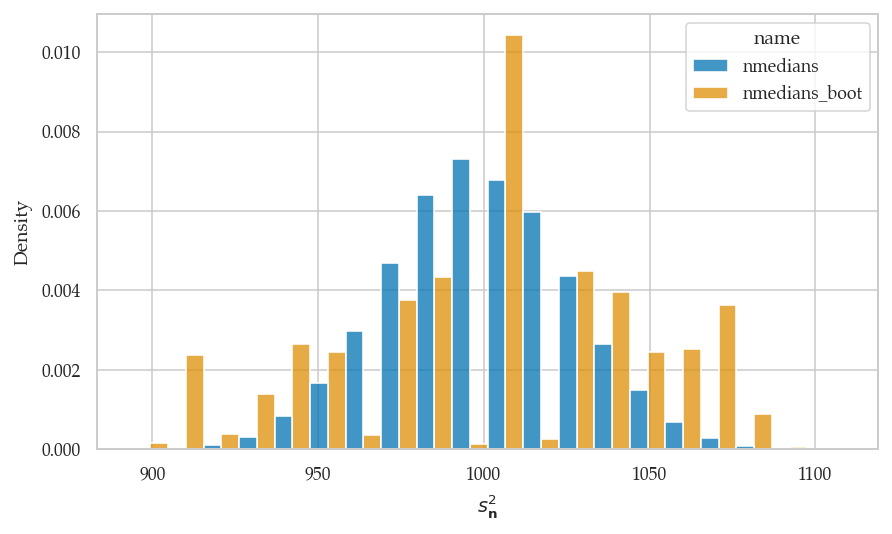

In [70]:
# combined histogram
df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': nmedians, 'name': 'nmedians'}),
    pd.DataFrame.from_dict({'value': 2*nmedians_boot, 'name': 'nmedians_boot'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=20, stat="density", x='value',
             hue='name', multiple='dodge',ax=ax)
_ = ax.set_xlabel("$s^2_{\mathbf{n}}$")

## Confidence intervals

### Bootstrap confidence intervals

### Analytical approximations

## Explanations

In [71]:
"\u03B8\u0302"

'θ̂'

In [72]:
print("x\u0305")

x̅


## Discussion

# CUT MATERIAL

## Example diff betweeen known Normals

In [73]:
# example parameters for each group
muA, sigmaA = 300, 10
muB, sigmaB = 200, 20

# size of samples for each group
nA = 5
nB = 4

#### Particular value of the estimator `dmeans`

In [74]:
xA = norm(muA, sigmaA).rvs(nA)  # random sample from Group A
xB = norm(muB, sigmaB).rvs(nB)  # random sample from Group B

d = dmeans(xA, xB)
d

114.90059542152875

The value of $\hat{d}$ computed from the samples is an estimate for the difference between means of two groups: $\Delta =  \mu_A - \mu_{B}$ (which we know is $100$ in this example).

In [75]:
# MAYBE USE IN EXERCISE
def gen_sampling_dist2(rvA, rvB, statfunc, nA, nB, N=1000):
    stats = []
    for i in range(0, N):
        xA = rvA.rvs(nA)
        xB = rvB.rvs(nB)
        stat = statfunc(xA, xB)
        stats.append(stat)
    return stats

In [76]:
def get_sampling_dist(statfunc, meanA, stdA, nA, meanB, stdB, nB, N=1000):
    """
    Obtain the sampling distribution of the statistic `statfunc`
    from `N` random samples drawn from groups A and B with parmeters:
      - Group A: `nA` values taken from `norm(meanA, stdA)`
      - Group B: `nB` values taken from `norm(meanB, stdB)`
    """
    stats = [] 
    for i in range(0, N):
        xA = norm(meanA, stdA).rvs(nA)  # random sample from Group A
        xB = norm(meanB, stdB).rvs(nB)  # random sample from Group B
        stat = statfunc(xA, xB)         # evaluate `statfunc`
        stats.append(stat)      # record the value of statfunc
    return stats

In [77]:
# Generate the sampling distirbution for dmeans
dmeans_sdist = get_sampling_dist(statfunc=dmeans,
                                 meanA=muA, stdA=sigmaA, nA=nA,
                                 meanB=muB, stdB=sigmaB, nB=nB)

print("Generated", len(dmeans_sdist), "values from `dmeans(XA, XB)`")

Generated 1000 values from `dmeans(XA, XB)`


In [78]:
# first 3 values
dmeans_sdist[0:3]

[97.76415644266726, 87.68172118335144, 97.97736999520333]

#### Plot the sampling distribution of `dmeans`

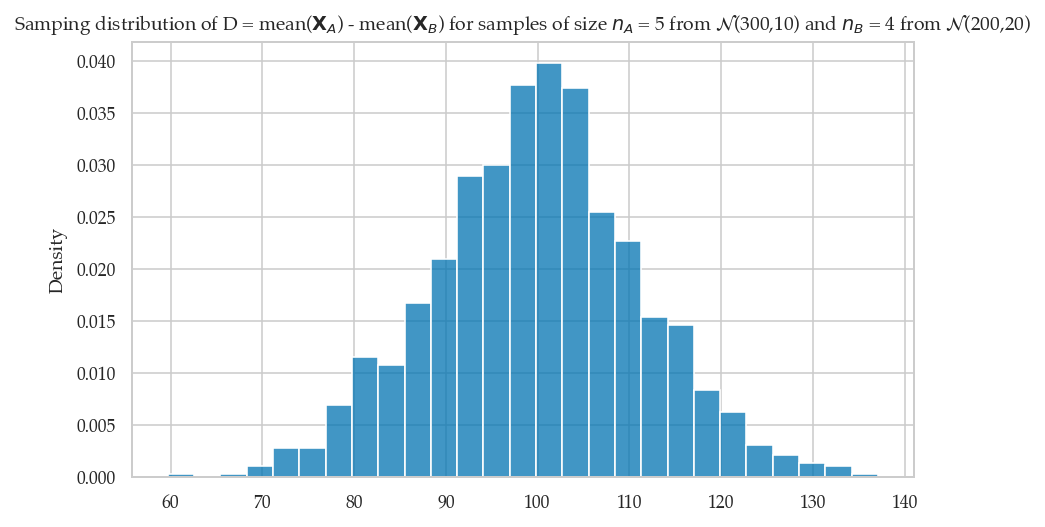

In [79]:
ax3 = sns.histplot(dmeans_sdist, stat="density")
title3 = "Samping distribution of D = mean($\mathbf{X}_A$) - mean($\mathbf{X}_B$) " + \
         "for samples of size $n_A$ = " + str(nA) + \
         " from $\mathcal{N}$(" + str(muA) + "," + str(sigmaA) + ")" + \
         " and $n_B$ = " + str(nB) + \
         " from $\mathcal{N}$(" + str(muB) + "," + str(sigmaB) + ")"
_ = ax3.set_title(title3)

#### Example 4: exponentially distributed population with known parameter

In [80]:
# from scipy.stats import expon
# lam = 0.2
# rvE = expon(0,1/lam)
# plot_pdf(rvE)